In [2]:
#Intermediate Level task - 2 Let's Grow More

In [3]:
#Loading all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
#Loading the iris dataset
data2 = pd.read_csv("C:\\Users\\G.Madhu mitha\\Downloads\\Iris.csv")
data2.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [6]:
data2.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data2.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Species'],
      dtype='object')

In [8]:
data2.size

750

In [9]:
data2.shape

(150, 5)

In [10]:
data2.nunique()

sepal length    35
sepal width     23
petal length    43
petal width     22
Species          3
dtype: int64

In [12]:
data2['sepal length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [13]:
data2['sepal width'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [14]:
data2['petal length'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [15]:
data2['petal width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [16]:
data2.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
Species         False
dtype: bool

In [14]:
#Checking for null values in the dataset
data2.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Species         0
dtype: int64

# Data visulisation

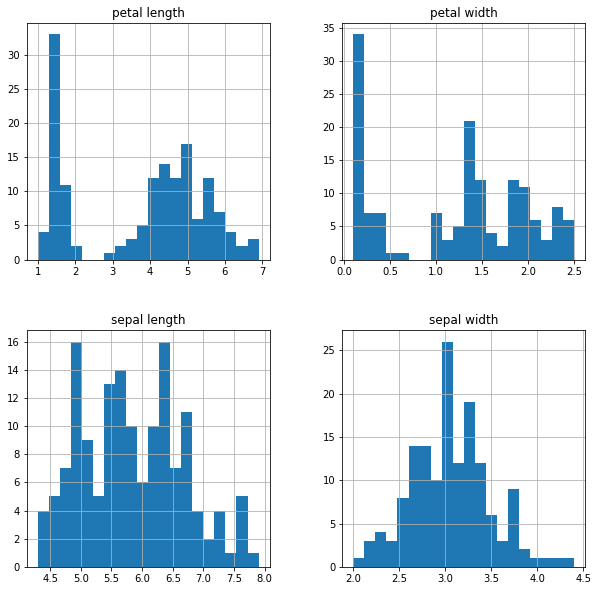

In [17]:
data2.hist(bins=20, figsize=(10, 10))
plt.show()

# Outlier detection and Removal

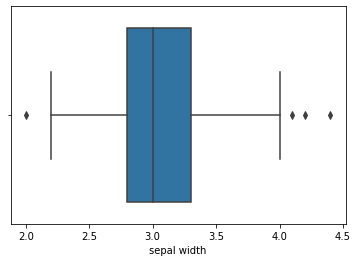

In [20]:
import seaborn as sn
sn.boxplot(data2['sepal width'])

In [21]:
q1 = data2['sepal width'].quantile(.25)
q3 = data2['sepal width'].quantile(.75)
print(q1)
print(q3)
IQR = q3-q1
print(IQR)
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

2.8
3.3
0.5


In [22]:
data2 = data2[data2['sepal width']<upper_limit]
data2 = data2[data2['sepal width']>lower_limit]

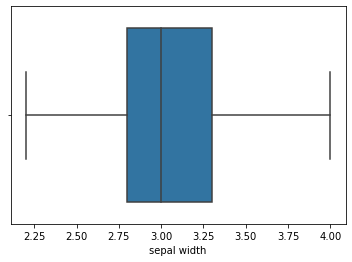

In [24]:
sn.boxplot(data2['sepal width'])

In [25]:
#hence outliers present in our dataset are now removed

In [26]:
#Feature extraction i.e feature and target splitting
X = data2.iloc[ : , :-1]
y = data2.iloc[ : ,-1]

In [27]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [29]:
#Splitting the data int train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
X_train.head()

,sepal length,sepal width,petal length,petal width
88,5.6,3.0,4.1,1.3
72,6.3,2.5,4.9,1.5
54,6.5,2.8,4.6,1.5
139,6.9,3.1,5.4,2.1
138,6.0,3.0,4.8,1.8


In [31]:
X_test.head()

,sepal length,sepal width,petal length,petal width
48,5.3,3.7,1.5,0.2
101,5.8,2.7,5.1,1.9
28,5.2,3.4,1.4,0.2
20,5.4,3.4,1.7,0.2
45,4.8,3.0,1.4,0.3


In [32]:
y_train.head()

88     Iris-versicolor
72     Iris-versicolor
54     Iris-versicolor
139     Iris-virginica
138     Iris-virginica
Name: Species, dtype: object

In [33]:
y_test.head()

48        Iris-setosa
101    Iris-virginica
28        Iris-setosa
20        Iris-setosa
45        Iris-setosa
Name: Species, dtype: object

In [34]:
#Training the model
tree = DecisionTreeClassifier(criterion='entropy')
tree

DecisionTreeClassifier(criterion='entropy')

In [35]:
#Fitting the model on train data
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [36]:
#Predicting the test data uing the model
y_pred = tree.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [37]:
tree.score(X_test,y_test)

0.9459459459459459

In [38]:
#Evaluating the performance on test data
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

In [39]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        16\nIris-versicolor       0.88      0.88      0.88         8\n Iris-virginica       0.92      0.92      0.92        13\n\n       accuracy                           0.95        37\n      macro avg       0.93      0.93      0.93        37\n   weighted avg       0.95      0.95      0.95        37\n'

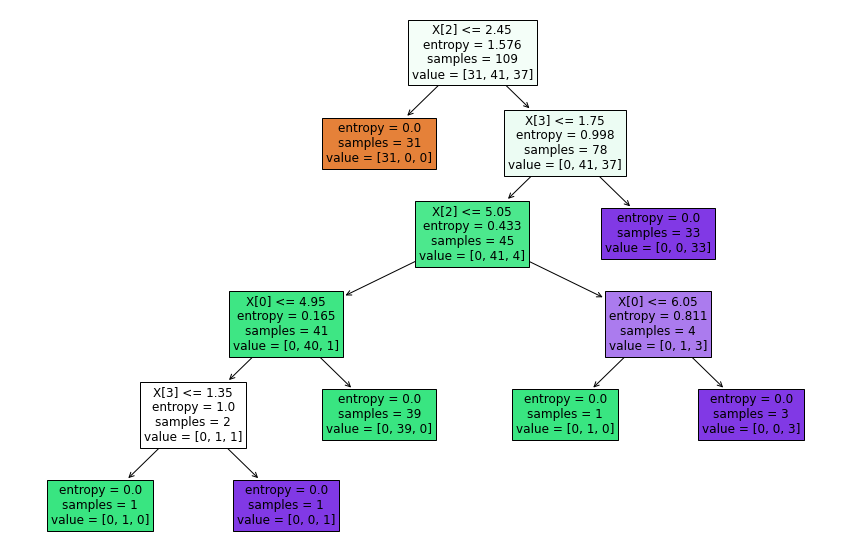

In [40]:
#Data visualization
plt.figure(figsize=(15,10))
plot_tree(tree, filled=True,fontsize=12)
plt.show()


In [41]:
#We can also give new data to the model and let's see how the model performs on the data it 
#has never seen before
pred = tree.predict([[5.8,6.8,4.9,2.4],
                    [5.5,4.2,1.4,0.2],
                    [5.8,2.8,5.1,2.4]])
pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)